In [2]:
from ConvergenceAnalysis import *
from DataAnalysisClass import *

single = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pV5Z', 'aug-cc-pV6Z']
single_polarized = ['aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ']
double = ['d-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z']
double_polarized = ['d-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
all_basis_sets = single + single_polarized + double + double_polarized


In [3]:

database_path = Path('/mnt/data/madness_data/post_watoc/august')
paper_path = Path('/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/Figures_v2')



In [4]:
import glob

# glob for .mol files in august molecules directory
mols = glob.glob('/mnt/data/madness_data/post_watoc/august/molecules/*.mol')
# remove .mol extension
mols = [mol.split('/')[-1].split('.')[0] for mol in mols]

In [5]:

august_database = PolarizabilityData(mols, 'hf', 'dipole', all_basis_sets, database_path,
                                     overwrite=False)


In [6]:

august_database.save_dfs()


In [7]:
august_database.polar_data.molecule.unique()

array(['FNO', 'CH3SH', 'C2H4', 'H2', 'Cl2', 'N2H2', 'CH3NH2', 'HOCl',
       'BeH2', 'SiO', 'Mg', 'HBS', 'HBO', 'CH2BH', 'Ne', 'PH3O', 'ClF',
       'HF', 'BH2Cl', 'Li2', 'SiH4', 'SF2', 'P2H4', 'CO2', 'NaCN', 'Ar',
       'OCl2', 'P2', 'CH3Cl', 'SCl2', 'HCCF', 'LiH', 'BF', 'SiH3F',
       'HCONH2', 'He', 'CS', 'S2H2', 'FCN', 'NaCl', 'SiH3Cl', 'N2H4',
       'NH2Cl', 'LiCl', 'NH3O', 'NH2OH', 'BH3', 'SO2', 'HCN', 'CH3BH2',
       'NaLi', 'HOF', 'CH3F', 'HNS', 'CH3OH', 'C2H2', 'Na2', 'F2', 'O3',
       'C6H6', 'CH2NH', 'ClCN', 'Mg2', 'NH3', 'H2O', 'PH3', 'N2', 'BHF2',
       'LiCN', 'NH2F', 'Be', 'CH4', 'HCl', 'HCCCl', 'HCOOH', 'HCHS',
       'LiH_s', 'HCHO', 'SH2', 'CSO', 'HOOH', 'CO', 'HCP', 'NOCl', 'HNO',
       'NaH', 'OF2', 'HNC', 'BH2F', 'LiBH4'], dtype=object)

In [8]:
polar_data = august_database.iso_data.copy()
polar_data

,molecule,basis,omega,alpha,gamma
0,FNO,MRA,0,16.061667,11.954531
1,FNO,MRA,1,16.066350,11.961972
2,FNO,MRA,2,16.080610,11.980014
3,FNO,MRA,3,16.104437,12.011002
4,FNO,MRA,4,16.138950,12.054358
...,...,...,...,...,...
13765,LiBH4,d-aug-cc-pV6Z,4,NaN,NaN
13766,LiBH4,d-aug-cc-pV6Z,5,NaN,NaN
13767,LiBH4,d-aug-cc-pV6Z,6,NaN,NaN
13768,LiBH4,d-aug-cc-pV6Z,7,NaN,NaN


In [36]:
# isolate the basis set data not MRA
basis_data = polar_data.query('basis!="MRA"').copy()
# set index to molecule and omega

# create a column of MRA alpha data for each molecule omega pair
basis_data = basis_data.set_index(['molecule', 'omega'])
basis_data['alphaMRA'] = polar_data.query('basis=="MRA"').set_index(['molecule', 'omega'])[
    'alpha']
# do the same for gamma
basis_data['gammaMRA'] = polar_data.query('basis=="MRA"').set_index(['molecule', 'omega'])[
    'gamma']
# reset index
basis_data = basis_data.reset_index()
# create a column of percent error in alpha
basis_data['alphaE'] = ((basis_data['alpha'] - basis_data['alphaMRA']) / basis_data['alpha'
                                                                                           'MRA'
                                                                                           ''] * 100)
# do the same for gamma
basis_data['gammaE'] = ((basis_data['gamma'] - basis_data['gammaMRA']) / basis_data['gamma'
                                                                                           'MRA'
                                                                                           ''] * 100)

basis_data=make_detailed_df(basis_data)


['D', 'T', 'Q', '5', '6']


/tmp/ipykernel_116112/3095815970.py:18: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.05,linestyle='--',color='orange')
/tmp/ipykernel_116112/3095815970.py:19: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-.05,linestyle='--',color='orange')


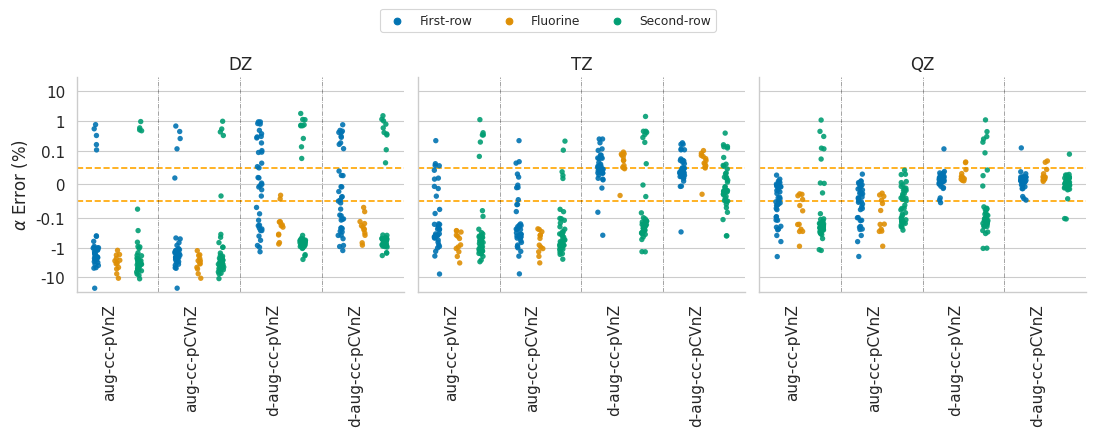

In [17]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib.collections
vlevel=['D','T','Q']
plot_data=basis_data.query('valence.isin(@vlevel) and omega==0').copy()
# remove unused categories from valence
plot_data.valence=plot_data.valence.cat.remove_unused_categories()
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.catplot(col='valence',x='Type',y='alphaE',hue='mol_system',
                  data=plot_data,kind='strip',dodge=True,jitter=True,
                  s=15,palette='colorblind',height=4,aspect=.8,sharey=True,alpha=0.9)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles('{col_name}Z')
    g.set_xlabels('')

    for ax in g.axes.flat:
        # draw horizontal line at .05%
        ax.set_yscale('symlog', linthresh=1e-1) 
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.yaxis.set_major_formatter(FormatStrFormatter('%2g'))

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))
        ax.set_ylim(-30,30)
        
        

        ax.set_ylabel(r'$\alpha$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_rotation(90)
            label.set_horizontalalignment('right')
        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.Type.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5,alpha=.5)
        # remove the legend title

# remove legend and create a new legend in 3 column format outside the plot
g._legend.remove()
g.fig.legend(loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)
g.fig.tight_layout()

g.fig.savefig(paper_path.joinpath('alpha_error.png'),dpi=600)

/tmp/ipykernel_116112/225729307.py:16: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.05,linestyle='--',color='orange')
/tmp/ipykernel_116112/225729307.py:17: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-.05,linestyle='--',color='orange')


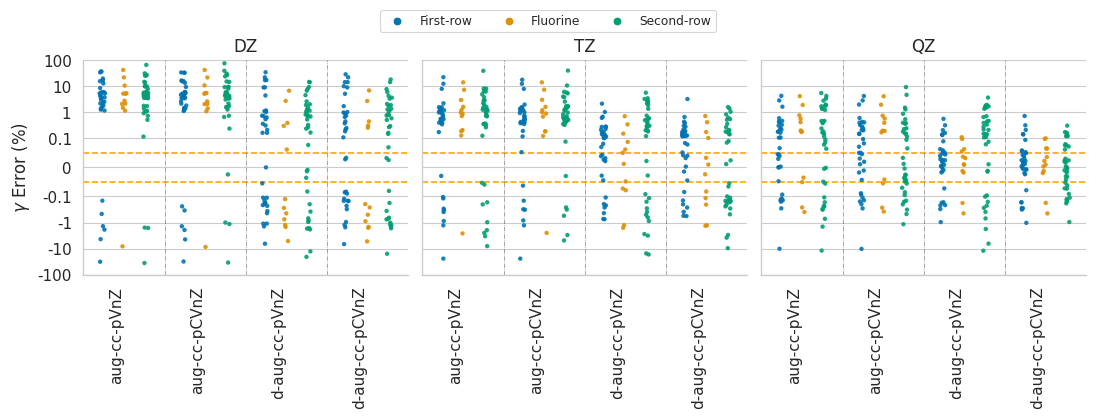

In [24]:

vlevel=['D','T','Q']
plot_data=basis_data.query('valence.isin(@vlevel) and omega==0 & gamma > 1e-3').copy()
# remove unused categories from valence
plot_data.valence=plot_data.valence.cat.remove_unused_categories()
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.catplot(col='valence',x='Type',y='gammaE',hue='mol_system',
                  data=plot_data,kind='strip',dodge=True,
                  s=10,palette='colorblind',height=4,aspect=.8,sharey=True,alpha=0.9)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles('{col_name}Z')

    g.set_xlabels('')
    for ax in g.axes.flat:
        # draw horizontal line at .05%
        ax.set_yscale('symlog', linthresh=1e-1)
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))
        ax.set_ylim(-100,100)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%2g'))

        ax.set_ylabel(r'$\gamma$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_rotation(90)
            label.set_horizontalalignment('right')
        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.Type.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5,alpha=.5)
        # remove the legend title

g.fig.tight_layout()
# remove legend and create a new legend in 3 column format outside the plot
g._legend.remove()
g.fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)

g.fig.savefig(paper_path.joinpath('gamma_error.png'),dpi=600)


In [36]:
plot_data.query('valence=="Q"').sort_values('gammaE',ascending=False).head(10)

,molecule,omega,basis,alpha,gamma,alphaMRA,gammaMRA,alphaE,gammaE,augmentation,polarization,mol_system,valence,Type
11286,SH2,0,aug-cc-pCVQZ,23.839711,0.411159,23.872550,0.376379,-0.137559,9.240760,aug,CV,Second-row,Q,aug-cc-pCVnZ
6210,LiCl,0,aug-cc-pVQZ,23.960626,0.800745,24.028807,0.759215,-0.283745,5.470176,aug,V,Second-row,Q,aug-cc-pVnZ
6246,LiCl,0,aug-cc-pCVQZ,24.000478,0.794723,24.028807,0.759215,-0.117896,4.676977,aug,CV,Second-row,Q,aug-cc-pCVnZ
9234,H2O,0,aug-cc-pVQZ,8.508389,1.162395,8.542136,1.114567,-0.395071,4.291153,aug,V,First-row,Q,aug-cc-pVnZ
12258,NaH,0,aug-cc-pVQZ,34.400229,6.818011,34.025267,6.540320,1.102012,4.245825,aug,V,Second-row,Q,aug-cc-pVnZ
9270,H2O,0,aug-cc-pCVQZ,8.508365,1.161738,8.542136,1.114567,-0.395348,4.232168,aug,CV,First-row,Q,aug-cc-pCVnZ
2466,HF,0,aug-cc-pVQZ,4.864793,1.317861,4.909196,1.265038,-0.904484,4.175644,aug,V,Fluorine,Q,aug-cc-pVnZ
2502,HF,0,aug-cc-pCVQZ,4.864931,1.317298,4.909196,1.265038,-0.901665,4.131121,aug,CV,Fluorine,Q,aug-cc-pCVnZ
12321,NaH,0,d-aug-cc-pVQZ,34.404377,6.780170,34.025267,6.540320,1.114202,3.667251,d-aug,V,Second-row,Q,d-aug-cc-pVnZ
3042,SF2,0,aug-cc-pVQZ,21.958125,3.299353,22.027333,3.191921,-0.314191,3.365772,aug,V,Second-row,Q,aug-cc-pVnZ


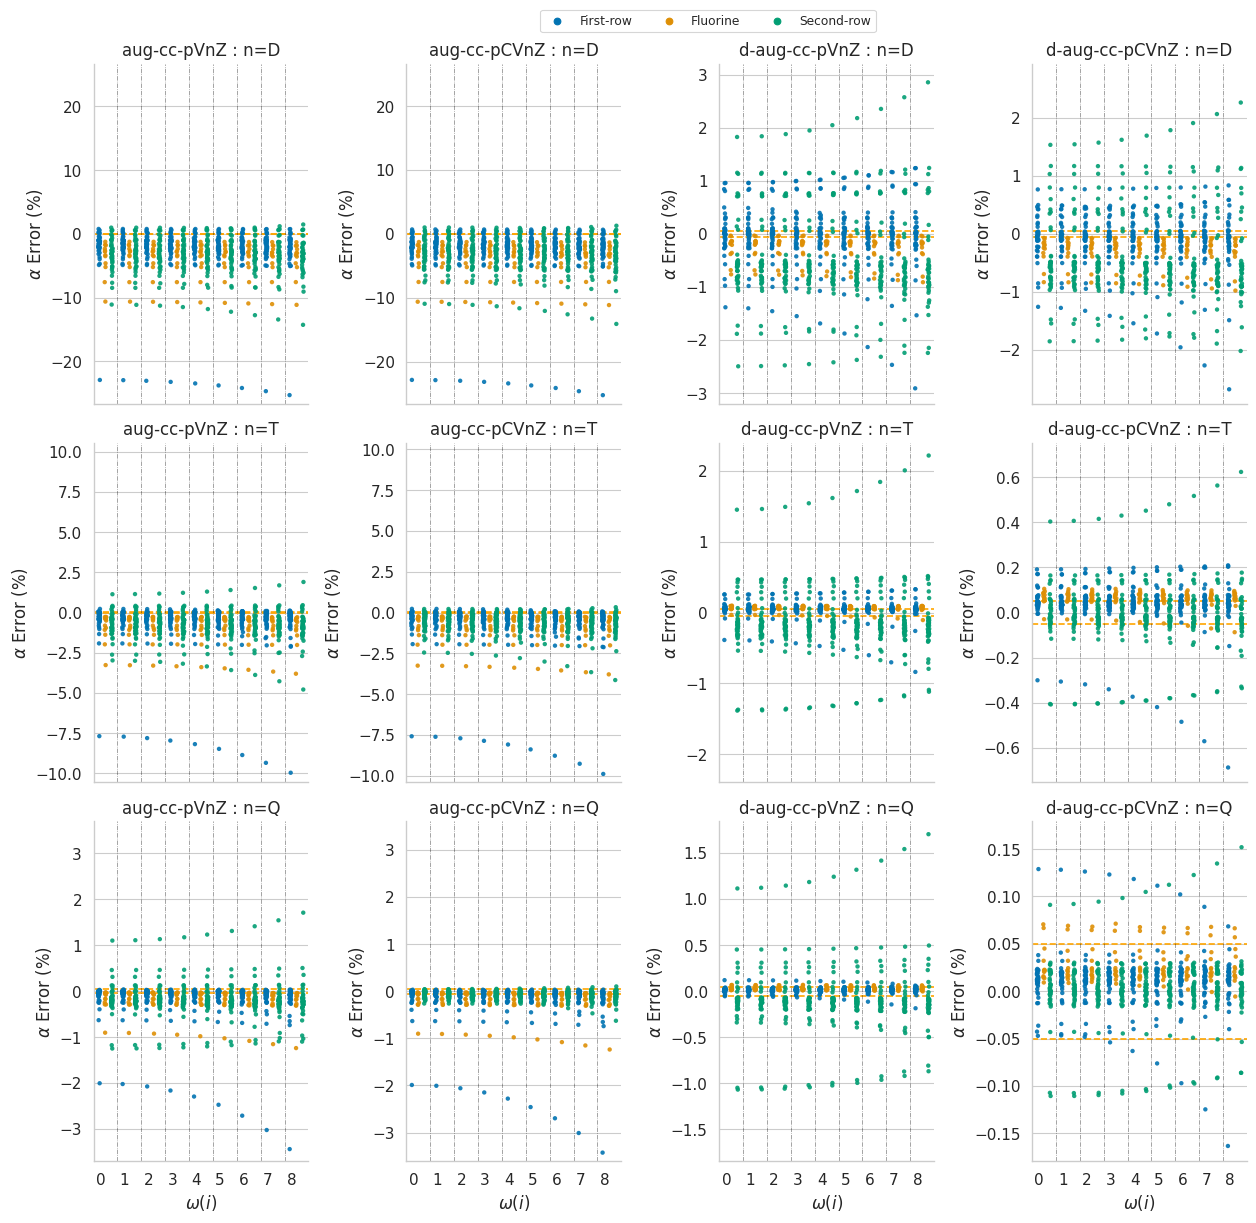

In [57]:
# Now make a plot of the frequency dependence of the error

vlevel=['D','T','Q']
plot_data=basis_data.query('valence.isin(@vlevel)').copy()
# remove unused categories from valence
plot_data.valence=plot_data.valence.cat.remove_unused_categories()
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.catplot(row='valence',col='Type',
                  x='omega',
                  y='alphaE',hue='mol_system',
                  data=plot_data,kind='strip',dodge=True,jitter=True,
                  s=10,palette='colorblind',height=4,aspect=.8,sharex=True,sharey=False,alpha=0.9,
                  margin_titles=True)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles('{col_name} : n={row_name}')
    
    

    g.set_xlabels('$\omega(i)$')
    for ax in g.axes.flat:
        # draw horizontal line at .05%rue
        #ax.set_yscale('symlog', linthresh=1e-2)
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))
        ax.set_ylim(-max_lim,max_lim)

        ax.set_ylabel(r'$\alpha$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')
            
        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.omega.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5, alpha=0.5)
        # remove the legend title

# remove legend and create a new legend in 3 column format outside the plot
g._legend.remove()
g.fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=3, fancybox=True)
g.tight_layout()

g.fig.savefig(paper_path.joinpath('alpha_freq_error.png'),dpi=600)


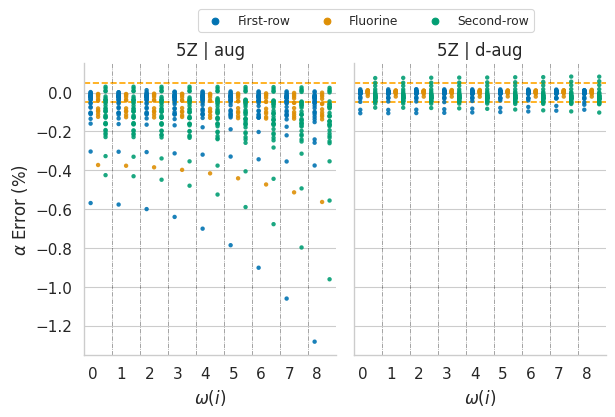

In [38]:
vlevel=['5']
plot_data=basis_data.query('valence.isin(@vlevel)').copy()
# remove unused categories from valence
plot_data.valence=plot_data.valence.cat.remove_unused_categories()
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.catplot(row='valence',col='augmentation',
                  x='omega',
                  y='alphaE',hue='mol_system',
                  data=plot_data,kind='strip',dodge=True,jitter=False,
                  s=10,palette='colorblind',height=4,aspect=.8,sharex=True,sharey=True,alpha=0.9,
                  margin_titles=True)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles(col_template='{col_name}',row_template='{row_name}Z')



    g.set_xlabels('$\omega(i)$')
    for ax in g.axes.flat:
        # draw horizontal line at .05%rue
        #ax.set_yscale('symlog', linthresh=1e-2)
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))


        ax.set_ylabel(r'$\alpha$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')

        for i in range(1, len(plot_data.omega.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5,alpha=.5)
        # remove the legend title

# remove legend and create a new legend in 3 column format outside the plot
g._legend.remove()
g.fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)




In [91]:
# query molecules with alphaE.abs()>.2 in singly augmented 5Z basis
plot_data=basis_data.query('valence=="5" and augmentation=="aug" and alphaE.abs()>.2').copy()
mol5=plot_data.molecule.unique()

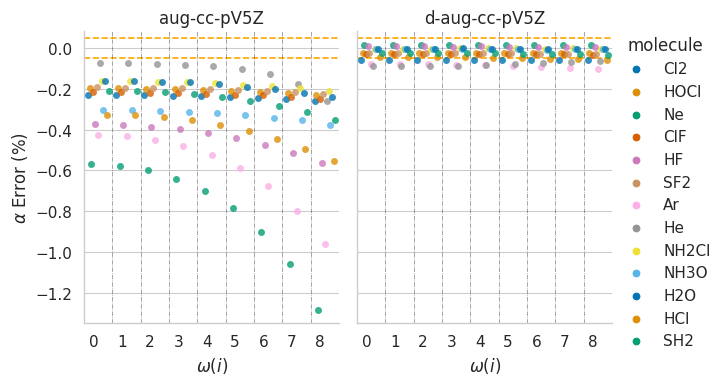

In [56]:
vlevel=['5']
plot_data=basis_data.query('valence.isin(@vlevel) and molecule.isin(@mol5)').copy()
# remove unused categories from valence
plot_data.valence=plot_data.valence.cat.remove_unused_categories()
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.catplot(row='valence',col='augmentation',
                  x='omega',
                  y='alphaE',hue='molecule',
                  data=plot_data,kind='strip',dodge=True,jitter=False,
                  s=25,palette='colorblind',height=4,aspect=.8,sharex=True,sharey=True,alpha=0.8,
                  margin_titles=True)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles('{col_name}-cc-pV{row_name}Z')



    g.set_xlabels('$\omega(i)$')
    for ax in g.axes.flat:
        # draw horizontal line at .05%rue
        #ax.set_yscale('symlog', linthresh=1e-2)
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))


        ax.set_ylabel(r'$\alpha$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')

        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.omega.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5,alpha=.5)
        # remove the legend title
#g.fig.tight_layout()
# remove legend and create a new legend in 3 column format outside the plot
#g._legend.remove()
#g.fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)

g.fig.savefig(paper_path.joinpath('alpha_freq_error_5Z_outliers.png'),dpi=600)


In [93]:
# query molecules with alphaE.abs()>.2 in singly augmented 5Z basis
plot_data=basis_data.query('valence=="Q" and Type=="d-aug-cc-pVnZ" and alphaE.abs()>.25').copy()
daug_outliers=plot_data.molecule.unique()
plot_data=basis_data.query('valence=="Q" and Type=="aug-cc-pVnZ" and alphaE.abs()>.6').copy()
aug_outliers=plot_data.molecule.unique()





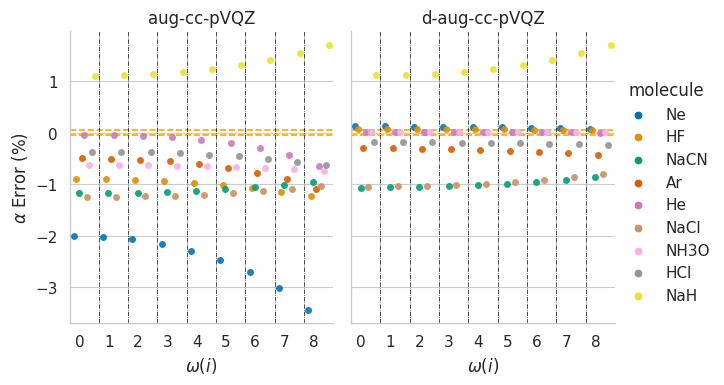

In [42]:
vlevel=['Q']
plot_data=(basis_data.query('valence.isin(@vlevel) & molecule.isin(@aug_outliers) & '
                            'polarization=="V"')
           .copy())
# remove unused categories from valence
plot_data.valence=plot_data.valence.cat.remove_unused_categories()
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.catplot(row='valence',col='augmentation',
                  x='omega',
                  y='alphaE',hue='molecule',
                  data=plot_data,kind='strip',dodge=True,jitter=False,
                  s=25,palette='colorblind',height=4,aspect=.8,sharex=True,sharey=True,alpha=0.9,
                  margin_titles=True)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles("{col_name}-cc-pVQZ")



    g.set_xlabels('$\omega(i)$')
    for ax in g.axes.flat:
        # draw horizontal line at .05%rue
        #ax.set_yscale('symlog', linthresh=1e-2)
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))


        ax.set_ylabel(r'$\alpha$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')

        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.omega.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5)
        # remove the legend title


g.fig.savefig(paper_path.joinpath('alpha_freq_error_augQ_outliers.png'),dpi=600)


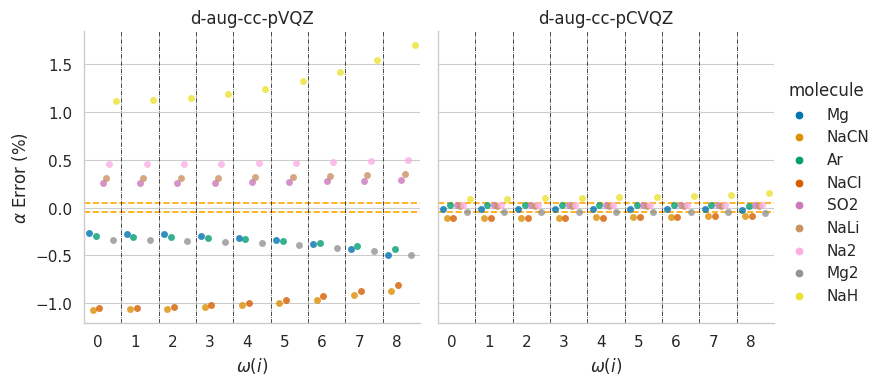

In [65]:
vlevel=['Q']
plot_data=(basis_data.query('valence.isin(@vlevel) & molecule.isin(@daug_outliers) and ' 
                            'augmentation =="d-aug"').copy())
# remove unused categories from valence
plot_data.valence=plot_data.valence.cat.remove_unused_categories()
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.catplot(row='valence',col='polarization',col_order=['V','CV'],
                  x='omega',
                  y='alphaE',hue='molecule',
                  data=plot_data,kind='strip',dodge=True,jitter=False,
                  s=25,palette='colorblind',height=4,aspect=1,sharex=True,sharey=True,alpha=0.8,
                  margin_titles=True)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles('d-aug-cc-p{col_name}QZ')



    g.set_xlabels('$\omega(i)$')
    for ax in g.axes.flat:
        # draw horizontal line at .05%rue
        #ax.set_yscale('symlog', linthresh=1e-2)
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))


        ax.set_ylabel(r'$\alpha$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')

        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.omega.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5)
        # remove the legend title


g.fig.savefig(paper_path.joinpath('alpha_freq_error_daugQ_outliers.png'),dpi=600)


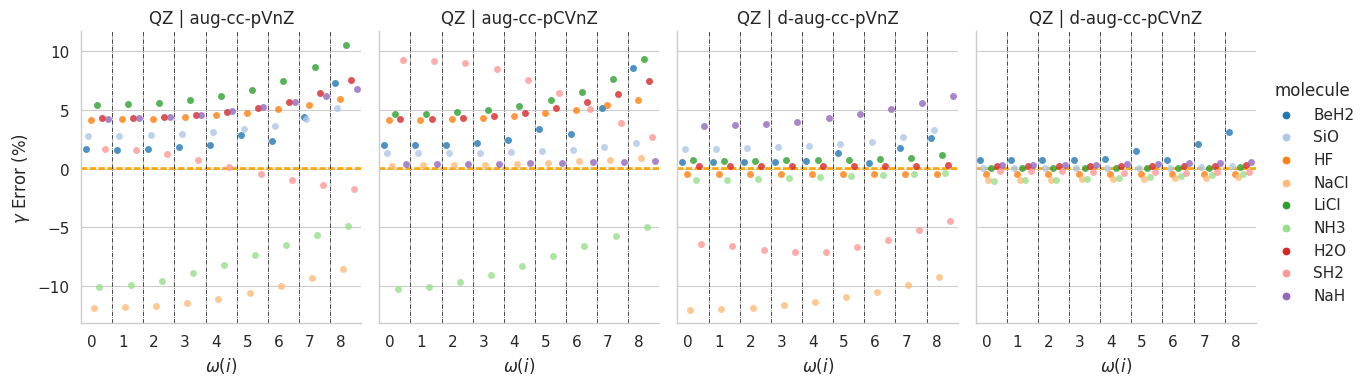

In [71]:

# Now make a plot of the frequency dependence of the error

# query molecules with alphaE.abs()>.2 in singly augmented 5Z basis
plot_data=basis_data.query('valence=="Q" and gammaE.abs()>4.0 & gamma.abs()>1e-3').copy()
gamma_outliers=plot_data.molecule.unique()



vlevel=['Q']
plot_data=basis_data.query('valence.isin(@vlevel) & gamma.abs()>1e-3 & molecule.isin(@gamma_outliers)').copy()
# remove unused categories from valence
plot_data.valence=plot_data.valence.cat.remove_unused_categories()
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.catplot(row='valence',col='Type',
                  x='omega',
                  y='gammaE',hue='molecule',
                  data=plot_data,kind='strip',dodge=True,jitter=False,
                  s=25,palette='tab20',height=4,aspect=.8,sharex=True,sharey='row',alpha=0.8,
                  margin_titles=True)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles(col_template='{col_name}',row_template='{row_name}Z')



    g.set_xlabels('$\omega(i)$')
    for ax in g.axes.flat:
        # draw horizontal line at .05%rue
        #ax.set_yscale('symlog', linthresh=1e-2)
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))


        ax.set_ylabel(r'$\gamma$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')

        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.omega.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5)
        # remove the legend title


g.fig.savefig(paper_path.joinpath('gamma_freq_error.png'),dpi=600)


In [69]:
plot_data

,molecule,omega,basis,alpha,gamma,alphaMRA,gammaMRA,alphaE,gammaE,augmentation,polarization,mol_system,valence,Type
1170,BeH2,0,aug-cc-pVQZ,19.003335,0.611135,19.008517,0.601250,-0.027260,1.644149,aug,V,First-row,Q,aug-cc-pVnZ
1171,BeH2,1,aug-cc-pVQZ,19.037490,0.606501,19.042723,0.596770,-0.027480,1.630672,aug,V,First-row,Q,aug-cc-pVnZ
1172,BeH2,2,aug-cc-pVQZ,19.140798,0.592331,19.146157,0.582440,-0.027990,1.698185,aug,V,First-row,Q,aug-cc-pVnZ
1173,BeH2,3,aug-cc-pVQZ,19.315833,0.567793,19.321347,0.557720,-0.028536,1.806028,aug,V,First-row,Q,aug-cc-pVnZ
1174,BeH2,4,aug-cc-pVQZ,19.567082,0.531406,19.572920,0.520980,-0.029826,2.001282,aug,V,First-row,Q,aug-cc-pVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12361,NaH,4,d-aug-cc-pCVQZ,35.371385,7.340642,35.334357,7.313870,0.104795,0.366042,d-aug,CV,Second-row,Q,d-aug-cc-pCVnZ
12362,NaH,5,d-aug-cc-pCVQZ,36.169086,7.841521,36.128503,7.810855,0.112330,0.392610,d-aug,CV,Second-row,Q,d-aug-cc-pCVnZ
12363,NaH,6,d-aug-cc-pCVQZ,37.208094,8.525730,37.162520,8.488410,0.122635,0.439657,d-aug,CV,Second-row,Q,d-aug-cc-pCVnZ
12364,NaH,7,d-aug-cc-pCVQZ,38.538341,9.454987,38.486470,9.410190,0.134776,0.476050,d-aug,CV,Second-row,Q,d-aug-cc-pCVnZ


In [72]:
august_database.polar_data
#isolate the basis set data not MRA
ij_basis_data=august_database.alpha_eigen.query('basis!="MRA"').copy()
ij_basis_data = ij_basis_data.set_index(['molecule', 'ij','omega'])
ij_basis_data['alphaMRA']=august_database.alpha_eigen.set_index(['molecule','ij','omega']).query('basis=="MRA"')['alpha']
# compute alpha error
ij_basis_data['alphaE']=((ij_basis_data['alpha']-ij_basis_data['alphaMRA'])/ij_basis_data['alphaMRA']*100)
ij_basis_data.reset_index(inplace=True)
ij_basis_data=make_detailed_df(ij_basis_data)

['D', 'T', 'Q', '5', '6']


In [109]:

# query molecules with alphaE.abs()>.2 in singly augmented 5Z basis
plot_data=basis_data.query('valence=="Q" and gammaE.abs()>4.0 & gamma>1e-3').copy()
gamma_outliers=plot_data.molecule.unique()
gamma_outliers




array(['BeH2', 'SiO', 'HF', 'NaCl', 'LiCl', 'NH3', 'H2O', 'SH2', 'NaH'],
      dtype=object)

/tmp/ipykernel_68132/905017864.py:23: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.05,linestyle='--',color='orange')
/tmp/ipykernel_68132/905017864.py:24: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-.05,linestyle='--',color='orange')


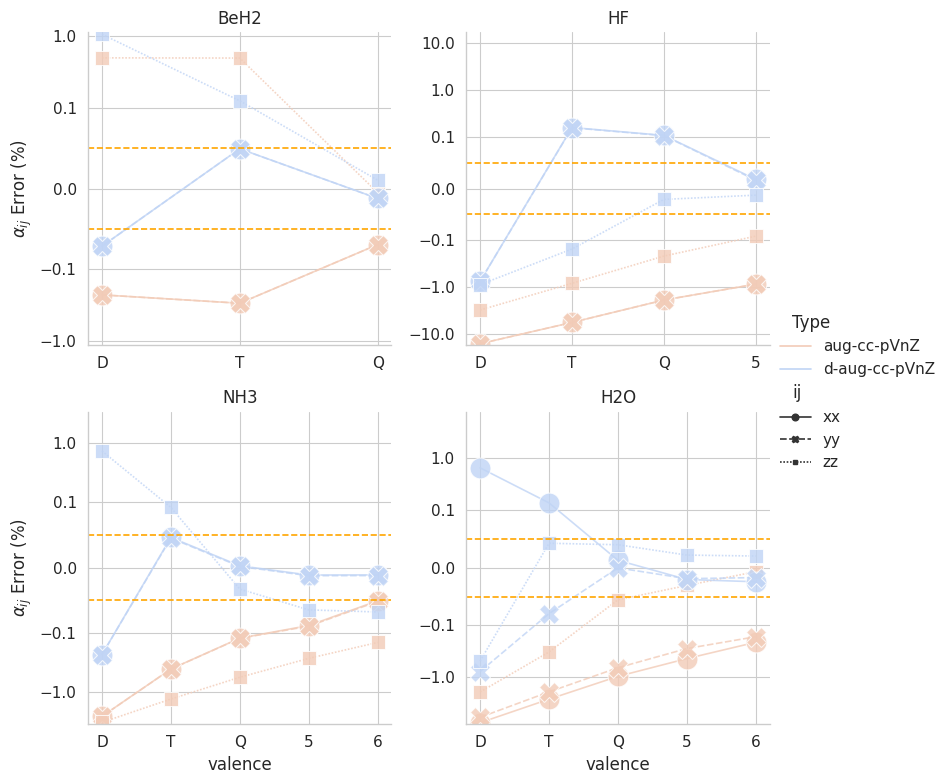

In [110]:
facet_kw={'sharey':False,'sharex':False}
ms=['First-row','Fluorine']
type=['aug-cc-pVnZ','d-aug-cc-pVnZ']

p_data=ij_basis_data.query('molecule.isin(@gamma_outliers) and mol_system.isin'
                         '(@ms) & Type.isin(@type) & omega==8').copy()
p_data.Type=p_data.Type.cat.remove_unused_categories()
# plot valence vs alpha error with component hue for each molecule
with sns.plotting_context('paper',font_scale=1.25,):
    g=sns.relplot(col='molecule',col_wrap=2,
        x='valence',y='alphaE',style='ij',hue='Type',kind='line',
                  data=p_data,
                  palette=simple_pal,
                  markers=True,
                  height=4,aspect=1,facet_kws=facet_kw,ms=15,alpha=.8,)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles(col_template='{col_name}')
    g.set_ylabels(r'$\alpha_{ij}$ Error (%)')
    
    for ax in g.axes.flat:
        # draw horizontal line at .05%rue
        ax.set_yscale('symlog', linthresh=1e-1)
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
        # set the yaxis to scalar formatter
        ax.yaxis.set_major_formatter(ScalarFormatter())
        # make the y limits symmetrical for each plot using the max absolute value
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))
        ax.set_ylim(-max_lim,max_lim)

g.savefig(paper_path.joinpath('first_and_fluorine_component_error.png'),dpi=600)



/tmp/ipykernel_68132/521989359.py:21: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.05,linestyle='--',color='orange')
/tmp/ipykernel_68132/521989359.py:22: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-.05,linestyle='--',color='orange')


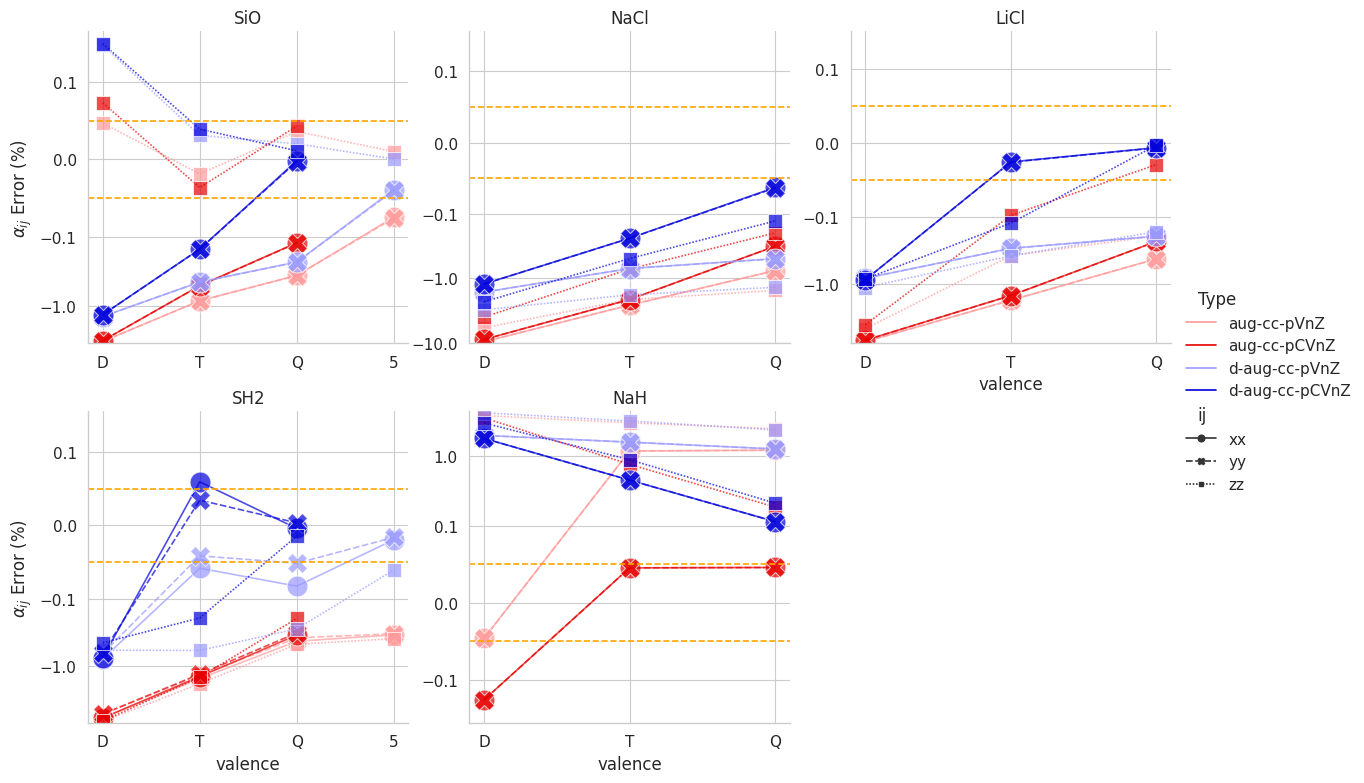

In [114]:
p_data=ij_basis_data.query('molecule.isin(@gamma_outliers) and mol_system.isin'
                         '(@ms) and omega==8')
#remove 
facet_kw={'sharey':False,'sharex':False}
ms=['Second-row']
# plot valence vs alpha error with component hue for each molecule
with sns.plotting_context('paper',font_scale=1.25,):
    g=sns.relplot(col='molecule',
                  x='valence',y='alphaE',style='ij',hue='Type',kind='line',
                  data=p_data,
                  markers=True,
                  col_wrap=3,
                  height=4,aspect=1,facet_kws=facet_kw,ms=15,alpha=.7)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles(col_template='{col_name}')
    g.set_ylabels(r'$\alpha_{ij}$ Error (%)')

    for ax in g.axes.flat:
        # draw horizontal line at .05%rue
        ax.set_yscale('symlog', linthresh=1e-1)
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
        # set the yaxis to scalar formatter
        ax.yaxis.set_major_formatter(ScalarFormatter())
        # make the y limits symmetrical for each plot using the max absolute value
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))

g.savefig(paper_path.joinpath('component_error.png'),dpi=600)


In [133]:
# energy plot
energy_data=august_database.energy_df.copy()
basis_e_data=energy_data.query('basis!="MRA"').copy()
basis_e_data=basis_e_data.set_index(['molecule'])
basis_e_data['eMRA']=energy_data.query('basis=="MRA"').set_index(['molecule'])['energy']
basis_e_data['eE']=((basis_e_data['energy']-basis_e_data['eMRA']))
basis_e_data.reset_index(inplace=True)
basis_e_data=make_detailed_df(basis_e_data)
basis_e_data

['D', 'T', 'Q', '5', '6']


,molecule,basis,energy,eMRA,eE,augmentation,polarization,mol_system,valence,Type
0,FNO,aug-cc-pVDZ,-228.654307,-228.729667,0.075360,aug,V,Fluorine,D,aug-cc-pVnZ
1,CH3SH,aug-cc-pVDZ,-437.728961,-437.765346,0.036385,aug,V,Second-row,D,aug-cc-pVnZ
2,C2H4,aug-cc-pVDZ,-78.043348,-78.070057,0.026709,aug,V,First-row,D,aug-cc-pVnZ
3,H2,aug-cc-pVDZ,-1.128793,-1.133622,0.004829,aug,V,First-row,D,aug-cc-pVnZ
4,Cl2,aug-cc-pVDZ,-918.966004,-919.010810,0.044806,aug,V,Second-row,D,aug-cc-pVnZ
...,...,...,...,...,...,...,...,...,...,...
1243,NaH,d-aug-cc-pCVQZ,-162.392976,-162.393346,0.000370,d-aug,CV,Second-row,Q,d-aug-cc-pCVnZ
1244,OF2,d-aug-cc-pCVQZ,-273.582100,-273.587208,0.005108,d-aug,CV,Fluorine,Q,d-aug-cc-pCVnZ
1245,HNC,d-aug-cc-pCVQZ,-92.899010,-92.900113,0.001103,d-aug,CV,First-row,Q,d-aug-cc-pCVnZ
1246,BH2F,d-aug-cc-pCVQZ,-125.384224,-125.386511,0.002287,d-aug,CV,Fluorine,Q,d-aug-cc-pCVnZ


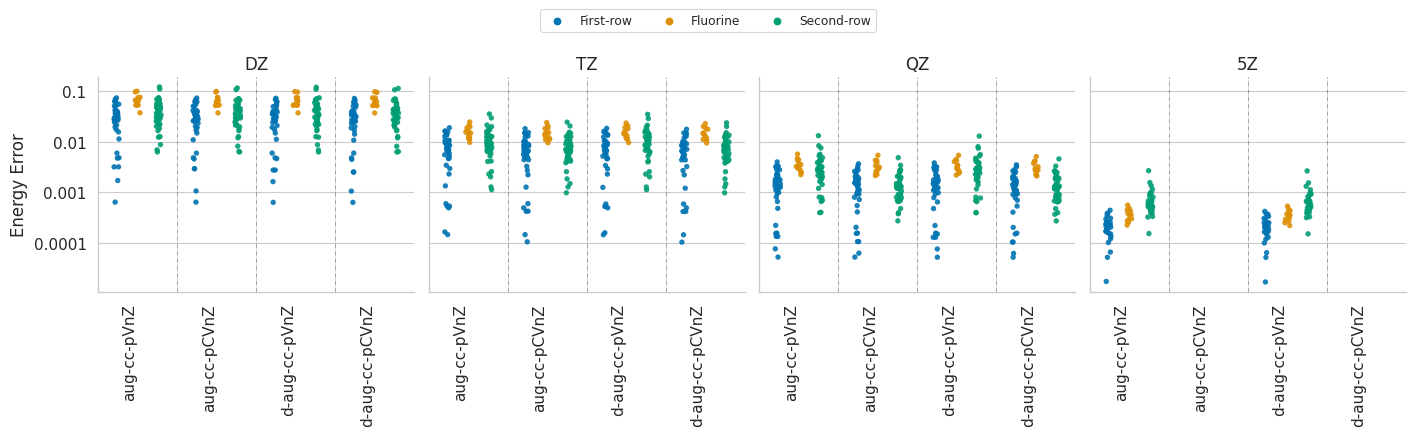

In [176]:
vlevel=['D','T','Q','5']
plot_data=basis_e_data.query('valence.isin(@vlevel)').copy()
# remove unused categories from valence
plot_data.valence=plot_data.valence.cat.remove_unused_categories()
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.catplot(col='valence',x='Type',y='eE',hue='mol_system',
                  data=plot_data,kind='strip',dodge=True,jitter=True,
                  s=15,palette='colorblind',height=4,aspect=.8,sharey=True,alpha=0.9)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles('{col_name}Z')
    g.set_xlabels('')

    for ax in g.axes.flat:
        # draw horizontal line at .05%
        ax.set_yscale('log')
        #ax.axhline(y=.05,linestyle='--',color='orange')
        #ax.axhline(y=-.05,linestyle='--',color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.yaxis.set_major_formatter(FormatStrFormatter('%2g'))


        ax.set_ylabel(r'Energy Error')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_rotation(90)
            label.set_horizontalalignment('right')
        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.Type.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5,alpha=.5)
        # remove the legend title

# remove legend and create a new legend in 3 column format outside the plot
g._legend.remove()
g.fig.legend(loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)
g.fig.tight_layout()

g.fig.savefig(paper_path.joinpath('energy_error.png'),dpi=600)


<Axes: xlabel='molecule', ylabel='eE'>

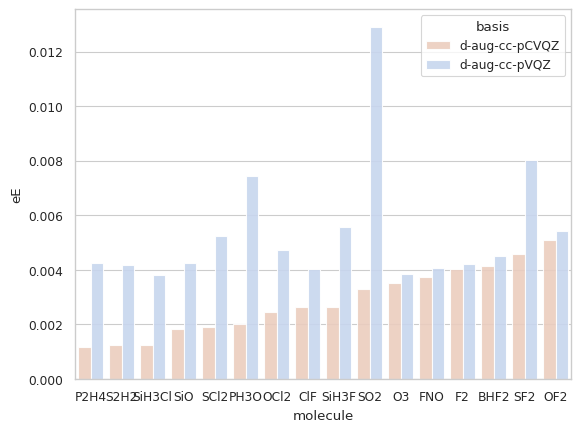

In [209]:
e_outliers=(basis_e_data.query('valence=="Q" & augmentation=="d-aug"').sort_values('eE',
                                                                                   ascending=False).head(20)).molecule.unique()
e_outliers=basis_e_data.query("molecule.isin(@e_outliers) & valence=='Q' & "
                              "augmentation=='d-aug'").sort_values('eE',ascending=True).sort_values('eE')
            
# create a barplot of the energy error for the outliers
sns.barplot(x='molecule',y='eE',hue='basis',data=e_outliers,dodge=True,
            alpha=.9,palette=simple_pal,fill=True)

<Axes: xlabel='molecule', ylabel='alphaE'>

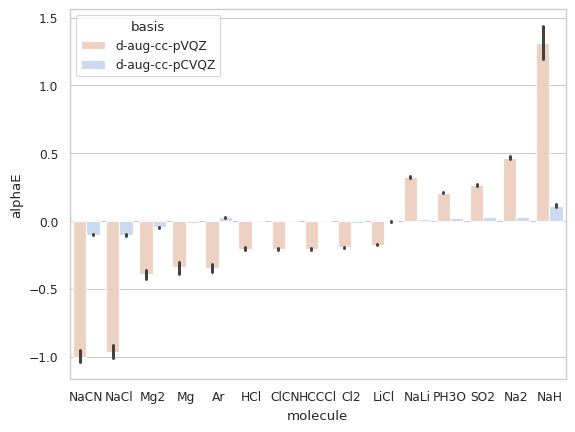

In [227]:

basis_data['absolute_alphaE']=basis_data.alphaE.abs()
a_outliers=(basis_data.query('valence=="Q" & augmentation=="d-aug" & omega==0').sort_values
            ('absolute_alphaE',
                                                                                   ascending=False).head(15)).molecule.unique()

a_outliers=(basis_data.query("molecule.isin(@a_outliers) & valence=='Q' & augmentation=='d-aug' ")
            .sort_values
            ('alphaE',ascending=True)
            .sort_values('alphaE'))

# create a barplot of the energy error for the outliers
sns.barplot(x='molecule',y='alphaE',hue='basis',data=a_outliers,dodge=True,
            alpha=.9,palette=simple_pal,fill=True)


<Axes: xlabel='molecule', ylabel='alphaE'>

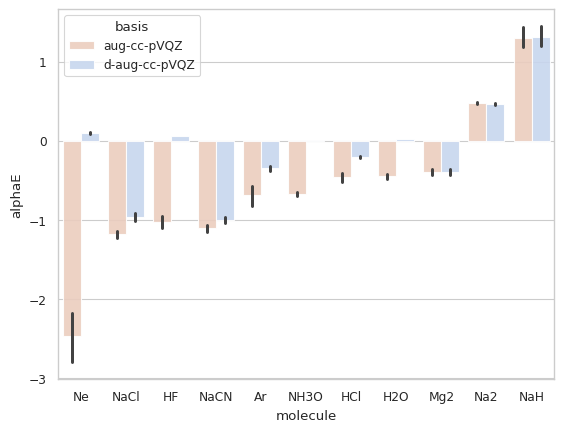

In [229]:

basis_data['absolute_alphaE']=basis_data.alphaE.abs()
a_outliers=(basis_data.query('valence=="Q" & augmentation=="aug" & omega==0').sort_values
            ('absolute_alphaE',
             ascending=False).head(15)).molecule.unique()

a_outliers=(basis_data.query("molecule.isin(@a_outliers) & valence=='Q' &polarization=='V'")
            .sort_values
            ('alphaE',ascending=True)
            .sort_values('alphaE'))

# create a barplot of the energy error for the outliers
sns.barplot(x='molecule',y='alphaE',hue='basis',data=a_outliers,dodge=True,
            alpha=.9,palette=simple_pal,fill=True)


In [135]:
basis_data
data=pd.DataFrame()
# for each frequency
for omega in basis_data.omega.unique():
    # filter data for frequency
    omega_data=basis_data.query('omega==@omega')
    # create the column for eE by first setting index to basis and molecule
    omega_data=omega_data.set_index(['basis','molecule'])
    # create a column of MRA energy data for each molecule omega pair
    omega_data['eE']=basis_e_data.set_index(['basis','molecule'])['eE']
    # reset index
    omega_data=omega_data.reset_index()
    # concat to full data
    data=pd.concat([data,omega_data])
    
bdata=data.copy()   

                                                               


/tmp/ipykernel_116112/117734490.py:27: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.02,linestyle='--',color='orange')
/tmp/ipykernel_116112/117734490.py:28: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-.02,linestyle='--',color='orange')


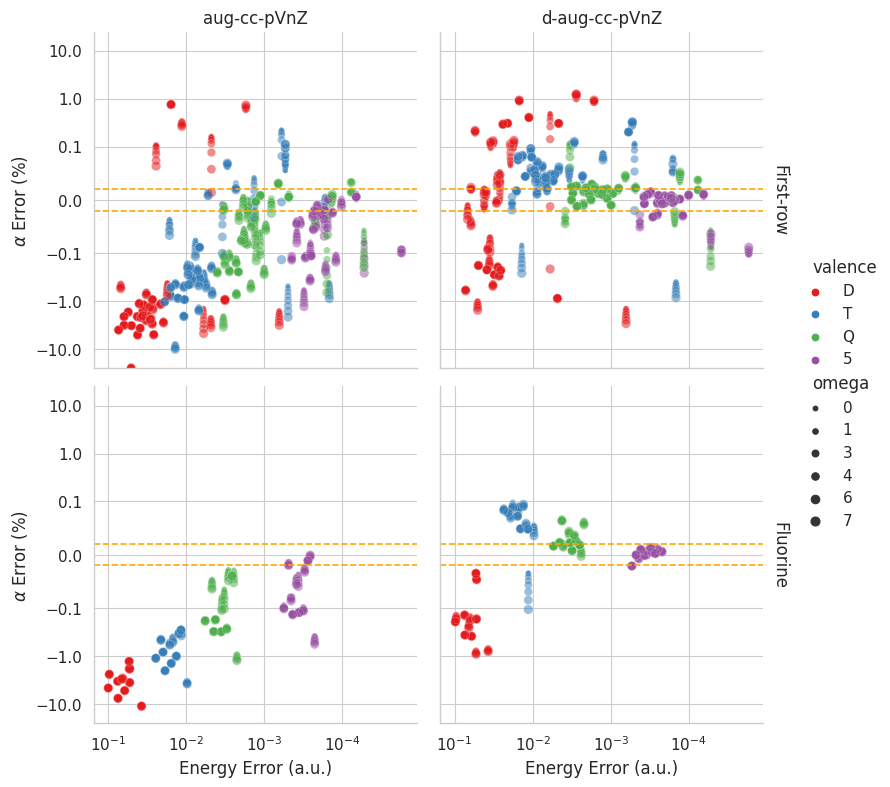

In [172]:
v_level=['D','T','Q','5']
omegas=[0,1,2,3,4,5,6,7,8]
molsys=['First-row','Fluorine']
types=['aug-cc-pVnZ','d-aug-cc-pVnZ']
data=(bdata.query('valence.isin(@v_level) & omega.isin(@omegas) & mol_system.isin(@molsys) & Type.isin(@types) ')
      .copy())
data.valence=data.valence.cat.remove_unused_categories()
data.Type=data.Type.cat.remove_unused_categories()
data.mol_system=data.mol_system.cat.remove_unused_categories()
data['absolute_alphaE']=data.alphaE.abs()

# relplot comparing energy error to alpha error
facet_kw={"sharey":True,"sharex":True,"margin_titles":True}
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.relplot(x='eE',y='alphaE',col='Type',hue='valence',data=data,kind='scatter',
                  size='omega',
                  legend=True,
                  row='mol_system',
                  palette='Set1',height=4,aspect=1,
                  alpha=0.5,facet_kws=facet_kw)
    g.set_xlabels('Energy Error (a.u.)')
    g.set_ylabels(r'$\alpha$ Error (%)')
    g.set_titles(row_template='{row_name}',col_template='{col_name}')
    for ax in g.axes.flat:
        ax.set_yscale('symlog', linthresh=1e-1)
        ax.set_xscale('log')
        ax.axhline(y=.02,linestyle='--',color='orange')
        ax.axhline(y=-.02,linestyle='--',color='orange')
        # reverse the x axis
        ax.set_xlim(ax.get_xlim()[::-1])
        # make the yaxis symmetrical
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))
        ax.set_ylim(-25,25)
        # use a scalar formatter for the y axis
        ax.yaxis.set_major_formatter(ScalarFormatter())
        # reverse the x axis


g.fig.gca().invert_xaxis()

g.fig.savefig(paper_path.joinpath('alpha_energy_error_1.png'),dpi=600)

        # remove the legend title

/tmp/ipykernel_116112/4062971920.py:20: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.02,linestyle='--',color='orange')
/tmp/ipykernel_116112/4062971920.py:21: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-.02,linestyle='--',color='orange')


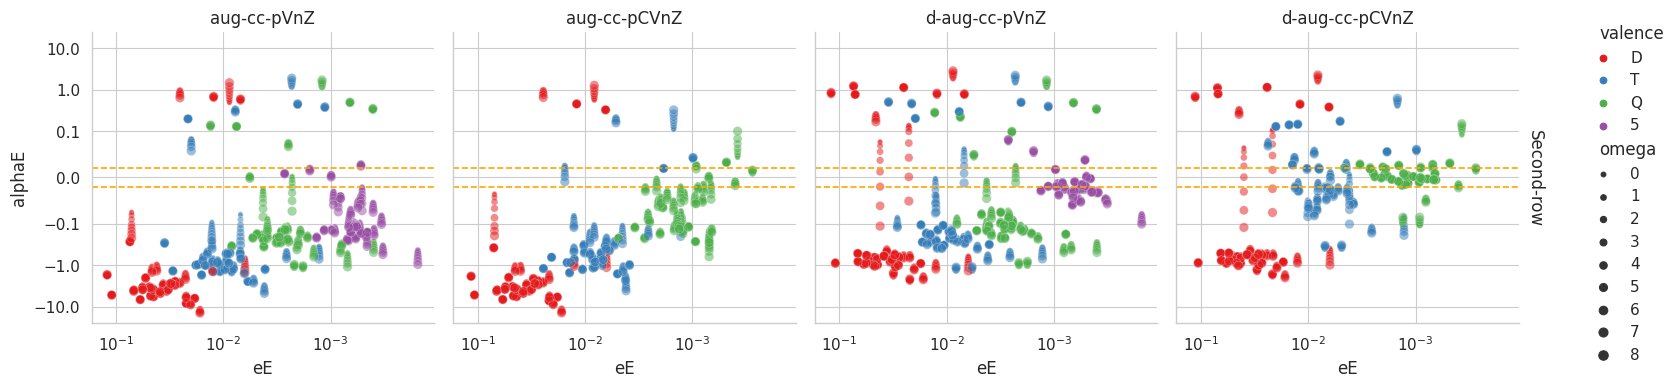

In [173]:
omegas=[0,1,2,3,4,5,6,7,8]
molsys=['Second-row']
data=bdata.query('valence.isin(@v_level) & omega.isin(@omegas) & mol_system.isin(@molsys) ').copy()
data.valence=data.valence.cat.remove_unused_categories()
data.mol_system=data.mol_system.cat.remove_unused_categories()
data['absolute_alphaE']=data.alphaE.abs()

# relplot comparing energy error to alpha error
facet_kw={"sharey":True,"sharex":True,"margin_titles":True}
with sns.plotting_context('paper',font_scale=1.25):
    g=sns.relplot(x='eE',y='alphaE',col='Type',hue='valence',data=data,kind='scatter',s=50,
                  row='mol_system',
                  size='omega',
                  palette='Set1',height=4,aspect=1,legend='full',
                  alpha=0.5,facet_kws=facet_kw)
    g.set_titles(row_template='{row_name}',col_template='{col_name}')
    for ax in g.axes.flat:
        ax.set_yscale('symlog', linthresh=1e-1)
        ax.set_xscale('log')
        ax.axhline(y=.02,linestyle='--',color='orange')
        ax.axhline(y=-.02,linestyle='--',color='orange')
        # reverse the x axis
        ax.set_xlim(ax.get_xlim()[::-1])
        # make the yaxis symmetrical
        max_lim=max(abs(ax.get_ylim()[0]),abs(ax.get_ylim()[1]))
        ax.set_ylim(-25,25)
        # use a scalar formatter for the y axis
        ax.yaxis.set_major_formatter(ScalarFormatter())
        # reverse the x axis


g.fig.gca().invert_xaxis()

g.fig.savefig(paper_path.joinpath('alpha_energy_error_2.png'),dpi=600)

